Ce programme présente une modélisation affine de la pression en fonction de l'altitude dans l'atmosphère terrestre. cette approximation est valable pour des basses altitudes, mais si on ajoute le relevé de pression d'un avion à une altitude de croisière, on se rend compte de l'erreur commise par ce modèle.

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import scipy

In [ ]:
altitude=np.array([0,500,1000,1500,2000,3000])
pression=np.array([1013,955,900,847,797,705])

point_avion=True

In [2]:
def regressionlineaire(datax, datay):
    "Calcul de pente, ordonnée origine et corrélation"
    n = len(datax)
    # Calcul de Moyenne(x)
    moy_x = 0
    for i in range(n):
        moy_x += datax[i]
    moy_x = moy_x / n
    # Calcul de Moyenne(y)
    moy_y = 0
    for i in range(n):
        moy_y += datay[i]
    moy_y = moy_y / n
    # Calcul de Moyenne(x*x)
    moy_x2 = 0
    for i in range(n):
        moy_x2 += datax[i] ** 2
    moy_x2 = moy_x2 / n
    # Calcul de Moyenne(y*y)
    moy_y2 = 0
    for i in range(n):
        moy_y2 += datay[i] ** 2
    moy_y2 = moy_y2 / n
    # Calcul de Moyenne(xy)
    moy_xy = 0
    for i in range(n):
        moy_xy += datax[i] * datay[i]
    moy_xy = moy_xy / n
    # Calcul de la pente
    pente = (moy_xy - moy_x * moy_y) / (moy_x2 - moy_x ** 2)
    # Calcul de l'ordonnée à l'origine
    ordonneeorigine = moy_y - moy_x * pente
    # Calcul du coef corrélation
    nume = moy_xy - moy_x * moy_y
    deno = (moy_x2 - moy_x ** 2) * (moy_y2 - moy_y **2)
    correlation = nume / np.sqrt(deno)
    
    return (pente, ordonneeorigine, correlation)

def moindres_carres(data_x,data_y):
    n=np.size(data_x)
    moy_x,moy_y=np.sum(data_x)/n,np.sum(data_y)/n
    sigma_xy=np.sum((data_x-moy_x)*(data_y-moy_y)/n)
    var_x=np.sum((data_x-moy_x)**2/n)
    var_y=np.sum((data_y-moy_y)**2/n)
    
    a=sigma_xy/var_x
    b=moy_y-a*moy_x
    r2=sigma_xy/np.sqrt(var_x*var_y)
    return(a,b,r2)

-0.10268571428571417 1006.4142857142856 -0.9988091526498439
-0.1026857142857143 1006.4142857142857 -0.9988091526498432


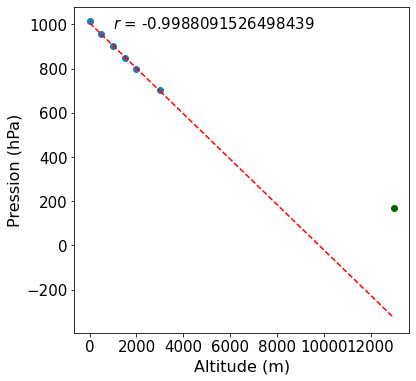

In [17]:
a,b,r=regressionlineaire(altitude,pression)
a2,b2,r2=moindres_carres(altitude,pression)
print(a,b,r)
print(a2,b2,r2)
h=np.linspace(0,3000,1000)


fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(altitude,pression)
ax.plot(h,a*h+b,c='r',linestyle='--')
ax.text(1000,980,r'$r$ = '+str(r),fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Altitude (m)',fontsize=16)
ax.set_ylabel('Pression (hPa)',fontsize=16)

if point_avion==True:
    ax.scatter([13000],[170],c='darkgreen')
    h2=np.linspace(3000,13000,1000)
    ax.plot(h2,a*h2+b,c='r',linestyle='--')

In [6]:
print('Pente : ',a,"Ordonnée à l'origine : ",b)
print('Pression à 1800 m : ',a*1800+b)

Pente :  -0.10268571428571417 Ordonnée à l'origine :  1006.4142857142856
Pression à 1800 m :  821.5800000000002


In [7]:
print(regressionlineaire(altitude,pression))

(-0.10268571428571417, 1006.4142857142856, -0.9988091526498439)


In [8]:
print(r**2)

0.9976197234170993
